In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model

In [2]:
data = pd.read_csv('D:\data\CCPP\Folds5x2_pp.csv')

In [3]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
data.shape

(9568, 5)

In [5]:
x = data[['AT','V','AP','RH']]
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [6]:
y = data[['PE']]

In [7]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [11]:
x_train.shape

(7176, 4)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [17]:
print(linreg.intercept_)
print(linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [20]:
y_pred = linreg.predict(x_test)

In [22]:
from sklearn import metrics
print("MSE = " , metrics.mean_squared_error(y_test,y_pred))

MSE =  20.080401202073904


In [25]:
print("RMSE = " , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE =  4.481116066570236


In [26]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.208907470136225
RMSE: 4.817562399194869


In [29]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg ,X,y,cv = 10)

In [30]:
print("MSE = " , metrics.mean_squared_error(y,predicted))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y,predicted)))

MSE =  20.7955974619431
RMSE =  4.560219014690314


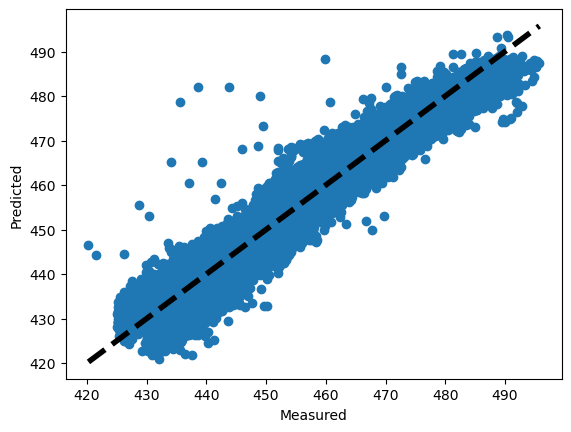

In [32]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()